In [8]:
import pandas as pd

p1 = pd.read_csv ('resultsGAp1.csv')   #read the csv file for p1
print (p1)

     pop_size   elite_size   mut_rate  mut_type  cross_type   time_avg (s)  \
0          80           30     0.0001      swap       order       9.884645   
1          80           30     0.0001      swap       cycle       2.521697   
2          80           30     0.0001    invert       order       9.603121   
3          80           30     0.0001    invert       cycle       2.903053   
4          80           30     0.0001    insert       order       9.554364   
..        ...          ...        ...       ...         ...            ...   
187       300           60     0.1000    invert       cycle     197.002859   
188       300           60     0.1000    insert       order     196.099110   
189       300           60     0.1000    insert       cycle     197.674795   
190       300           60     0.1000      disp       order     155.339636   
191       300           60     0.1000      disp       cycle     197.296876   

      best_distance_avg    nr_generations_avg  
0              

# Problema 1 (CH130)

In [9]:
p1.describe() ##a minima distancia que atingimos é 15955. o desvio padrão é alto (7112), ou seja, a distancia depende muito da escolha dos hyperparametros.
#a média e mediana do numero de generations ronda os 130, o que significa que o algoritmo na maioria das vezes para antes das 250 generations fixas. provavelmente está a haver pouca exploração das soluções, pois isto significa que o algoritmo ficou preso num mínimo local (que sabemos que não é global, pois a solução ótima é 6 mil e tal).

,pop_size,elite_size,mut_rate,time_avg (s),best_distance_avg,nr_generations_avg
count,192.000000,192.000000,192.000000,192.000000,192.000000,192.000000
mean,176.666667,45.000000,0.027775,84.367925,27636.946875,136.125000
std,92.012595,15.039216,0.041988,261.829126,7112.480149,80.393856
min,80.000000,30.000000,0.000100,1.770680,15955.000000,25.800000
25%,80.000000,30.000000,0.000775,8.411066,21223.250000,50.300000
50%,150.000000,45.000000,0.005500,32.403040,25923.600000,133.900000
75%,300.000000,60.000000,0.032500,63.914457,34025.950000,214.500000
max,300.000000,60.000000,0.100000,2609.166959,39590.000000,250.000000


# 1.1 Correlação entre numéricas (todas exceto mut_type e cross_type)

(array([0.5, 1.5, 2.5, 3.5, 4.5, 5.5]),
 [Text(0.5, 0, 'pop_size'),
  Text(1.5, 0, ' elite_size'),
  Text(2.5, 0, ' mut_rate'),
  Text(3.5, 0, ' time_avg (s)'),
  Text(4.5, 0, ' best_distance_avg'),
  Text(5.5, 0, '  nr_generations_avg')])

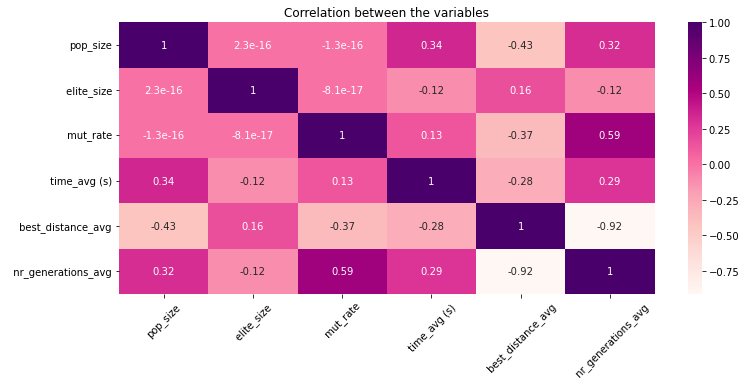

In [28]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.subplots(figsize=(12,5))
gender_correlation=p1.corr()
sns.heatmap(gender_correlation,annot=True,cmap='RdPu')
plt.title('Correlation between the numerical variables')
plt.xticks(rotation=45)                                           

#daqui vemos que a variável que tem mais correlação com a solução é o nr de generations e o pop size. no entanto, é negativa. 
#ou seja, quanto maior a população, menor a distancia, e melhor a solução.
#quanto maior os nr de gerações, menor a distancia, e melhor a solução.
#nota que, quanto maior a mutation rate, maior o nr de gerações.

#Assim, aumentando a mutation rate, aumenta o nr de gerações, que diminui a distância. 
#Este facto, faz sentido pois se aumentarmos a mutation rate, aumentamos também a exploração de diferente soluções,
#o que faz com que o algoritmo tenha necessidade de correr durante mais tempo e consiga atingir melhores soluções.

# 1.2. Influência entre Mut_type e Cross_type e Distância

Para ver a influencia que as categóricas (mut_type) e (cross_type) tem na variável resposta, distância,
vamos fazer um teste não paramétrico (kruskal wallis) para comparaçao das médias.

In [144]:
#Mutation type
searchString = "swap"
p1_swap_only=p1.loc[p1[' mut_type'].str.contains(searchString, regex=False)]
searchString = "invert"
p1_invert_only=p1.loc[p1[' mut_type'].str.contains(searchString, regex=False)]
searchString = "insert"
p1_insert_only=p1.loc[p1[' mut_type'].str.contains(searchString, regex=False)]
searchString = "disp"
p1_disp_only=p1.loc[p1[' mut_type'].str.contains(searchString, regex=False)]

#Crossover type
searchString = "order"
p1_order_only=p1.loc[p1[' cross_type'].str.contains(searchString, regex=False)]
searchString = "cycle"
p1_cycle=p1.loc[p1[' cross_type'].str.contains(searchString, regex=False)]

#Population Size
p1_80_only=p1.loc[p1['pop_size'] == 80]
p1_150_only=p1.loc[p1['pop_size'] == 150]
p1_300_only=p1.loc[p1['pop_size'] == 300]


#Elite Size
p1_30_only=p1.loc[p1[' elite_size'] == 30]
p1_60_only=p1.loc[p1[' elite_size'] == 60]


#Mutation rate
p1_mut1_only=p1.loc[p1[' mut_rate'] == 0.0001]
p1_mut2_only=p1.loc[p1[' mut_rate'] == 0.001]
p1_mut3_only=p1.loc[p1[' mut_rate'] == 0.01]
p1_mut4_only=p1.loc[p1[' mut_rate'] == 0.1]

In [111]:
from scipy import stats
x = p1_swap_only[' best_distance_avg']
y = p1_invert_only[' best_distance_avg']
z = p1_insert_only[' best_distance_avg']
w = p1_disp_only[' best_distance_avg']
stats.kruskal(x, y, z, w)

#Como o p-value é muito grande, podemos concluir que não existem diferenças significativas entre os grupos. no significant differences between the groups.
#Logo, o tipo de mutação não parece influenciar muito a distância.

KruskalResult(statistic=0.6127887521588491, pvalue=0.8934985413441241)

In [113]:
x = p1_order_only[' best_distance_avg']
y = p1_cycle_only[' best_distance_avg']
stats.kruskal(x, y)

#Como o p-value é menor que 5%, podemos concluir que existem diferenças significativas entre os grupos.
#Logo, o tipo de crossover parece influenciar muito a distância.

KruskalResult(statistic=74.677036107513, pvalue=5.543722286555121e-18)

# 1.3. Análise por cada hyper-parametro


## 1.3.1. Análise por tipo de crossover

In [123]:
p1_order_only[' best_distance_avg'].describe()

count       96.000000
mean     23127.204167
std       5333.526648
min      15955.000000
25%      19637.000000
50%      21381.800000
75%      24845.450000
max      37573.200000
Name:  best_distance_avg, dtype: float64

In [118]:
p1_cycle_only[' best_distance_avg'].describe()

count       96.000000
mean     32146.689583
std       5670.715787
min      19673.200000
25%      29146.200000
50%      33299.300000
75%      36676.400000
max      39590.000000
Name:  best_distance_avg, dtype: float64

In [120]:
##Analisando por tipo de crossover, parece que o order crossover traz melhores resultados. O máximo de distancia atingido é menor, 
#a média é menor, o desvio padrão é menor, e é com este que se atinge o valor mínimo de 15955.

#Por isso, se calhar é melhor fazer mais runs com o order crossover.

## 1.3.2. Análise por tipo de mutação

In [124]:
p1_swap_only[' best_distance_avg'].describe()

count       48.000000
mean     27965.200000
std       6908.398312
min      16724.000000
25%      21747.100000
50%      26200.600000
75%      34735.200000
max      39239.800000
Name:  best_distance_avg, dtype: float64

In [125]:
p1_insert_only[' best_distance_avg'].describe()

count       48.000000
mean     27517.554167
std       6960.366486
min      16319.200000
25%      21005.050000
50%      25231.800000
75%      33760.650000
max      39100.800000
Name:  best_distance_avg, dtype: float64

In [126]:
p1_invert_only[' best_distance_avg'].describe()

count       48.000000
mean     27187.575000
std       7573.341894
min      15955.000000
25%      19859.500000
50%      25625.800000
75%      34267.750000
max      39590.000000
Name:  best_distance_avg, dtype: float64

In [127]:
p1_disp_only[' best_distance_avg'].describe()

count       48.000000
mean     27877.458333
std       7187.516387
min      16769.400000
25%      21368.600000
50%      25734.500000
75%      33903.400000
max      39517.800000
Name:  best_distance_avg, dtype: float64

In [129]:
##Lá em cima, vimos que o tipo de mutação não parece influenciar a distância. 
#De facto, os valores médios são todos muito parecidos. O melhor valor médio e melhor valor mínimo é obtido com
#invert mutation, apesar de esta ser também a que possui um maior desvio padrão na distância.
#Mas como a distancia nao parece depender do tipo de mutação, pode-se fazer mais runs com a invert mutation.

## 1.3.3. Análise por population size

In [ ]:
p1_80_only=p1.loc[p1['pop_size'] == 80]
p1_150_only=p1.loc[p1['pop_size'] == 150]
p1_300_only=p1.loc[p1['pop_size'] == 300]


#Elite Size
p1_30_only=p1.loc[p1[' elite_size'] == 30]
p1_60_only=p1.loc[p1[' elite_size'] == 60]


#Mutation rate
p1_mut1_only=p1.loc[p1[' mut_rate'] == 0.0001]
p1_mut2_only=p1.loc[p1[' mut_rate'] == 0.001]
p1_mut3_only=p1.loc[p1[' mut_rate'] == 0.01]
p1_mut4_only=p1.loc[p1[' mut_rate'] == 0.1]

In [145]:
p1_80_only[' best_distance_avg'].describe()

count       64.000000
mean     32370.575000
std       6116.484507
min      19441.400000
25%      25990.300000
50%      34239.300000
75%      37531.050000
max      39590.000000
Name:  best_distance_avg, dtype: float64

In [148]:
p1_150_only[' best_distance_avg'].describe()

count       64.000000
mean     26354.978125
std       6593.676371
min      16813.400000
25%      21434.300000
50%      23319.800000
75%      33726.900000
max      36350.200000
Name:  best_distance_avg, dtype: float64

In [149]:
p1_300_only[' best_distance_avg'].describe()

count       64.000000
mean     24185.287500
std       5995.383263
min      15955.000000
25%      19675.600000
50%      21249.100000
75%      31086.450000
max      34111.000000
Name:  best_distance_avg, dtype: float64

In [150]:
#O population size, como vimos na tabela das correlações acima, era negativamente correlacionado com a distância, logo
#um maior population size é melhor. 
#Além disso, possui melhores valores em todos os parâmetros.

## 1.3.4. Análise por elite size

In [152]:
p1_30_only[' best_distance_avg'].describe()

count       96.000000
mean     26508.397917
std       6716.879710
min      16563.200000
25%      21018.250000
50%      24688.800000
75%      33088.850000
max      38035.600000
Name:  best_distance_avg, dtype: float64

In [153]:
p1_60_only[' best_distance_avg'].describe()

count       96.000000
mean     28765.495833
std       7349.606436
min      15955.000000
25%      21296.600000
50%      31969.000000
75%      34699.450000
max      39590.000000
Name:  best_distance_avg, dtype: float64

In [160]:
###Como foi visto na tabela das correlações, não há grande diferença entre o elite_size e a distância.

## 1.3.5. Análise por mutation rate

In [155]:
p1_mut1_only[' best_distance_avg'].describe()

count       48.000000
mean     30091.416667
std       6560.702958
min      19518.800000
25%      23338.550000
50%      33033.400000
75%      35350.750000
max      39590.000000
Name:  best_distance_avg, dtype: float64

In [156]:
p1_mut2_only[' best_distance_avg'].describe()

count       48.000000
mean     29716.670833
std       6848.718285
min      18285.400000
25%      23196.850000
50%      32029.000000
75%      35231.500000
max      39517.800000
Name:  best_distance_avg, dtype: float64

In [157]:
p1_mut3_only[' best_distance_avg'].describe()

count       48.000000
mean     27550.175000
std       7232.944669
min      15955.000000
25%      20162.000000
50%      29076.200000
75%      33417.050000
max      38529.400000
Name:  best_distance_avg, dtype: float64

In [158]:
p1_mut4_only[' best_distance_avg'].describe()

count       48.000000
mean     23189.525000
std       5704.143284
min      16319.200000
25%      19615.250000
50%      21402.900000
75%      24828.450000
max      37670.800000
Name:  best_distance_avg, dtype: float64

In [159]:
#O melhor é mut4. Como vimos no gráfico das correlações, uma mutação maior é melhor. 

### 1.4. Conclusões:
Para o Problema 1 -> elite size 30, mutation_rate de 10% ou mais, population_size de 300 ou mais, order crossover, invert mutation. numero de generations maior.

In [163]:
p2 = pd.read_csv ('resultsGAp2.csv')   #read the csv file for p2

# Problema 2 (tsp225)

In [165]:
p2.describe() ##a minima distancia que atingimos é 16809. o desvio padrão é alto (6075), ou seja, a distancia depende muito da escolha dos hyperparametros.
#a média e mediana do numero de generations ronda os 150/160, o que significa que o algoritmo na maioria das vezes para antes das 250 generations fixas. provavelmente está a haver pouca exploração das soluções, pois isto significa que o algoritmo ficou preso num mínimo local (que sabemos que não é global, pois a solução ótima é 3916).

,pop_size,elite_size,mut_rate,time_avg (s),best_distance_avg,nr_generations_avg
count,192.000000,192.000000,192.000000,192.000000,192.000000,192.000000
mean,176.666667,45.000000,0.027775,78.901460,26489.742708,150.560417
std,92.012595,15.039216,0.041988,85.107853,6075.505987,85.367483
min,80.000000,30.000000,0.000100,2.966754,16809.600000,27.400000
25%,80.000000,30.000000,0.000775,12.635669,20859.150000,53.950000
50%,150.000000,45.000000,0.005500,50.034330,25411.900000,162.700000
75%,300.000000,60.000000,0.032500,95.060479,32227.500000,247.250000
max,300.000000,60.000000,0.100000,270.291238,36421.800000,250.000000


# 2.1. Correlação entre numéricas (todas exceto mut_type e cross_type)

(array([0.5, 1.5, 2.5, 3.5, 4.5, 5.5]),
 [Text(0.5, 0, 'pop_size'),
  Text(1.5, 0, ' elite_size'),
  Text(2.5, 0, ' mut_rate'),
  Text(3.5, 0, ' time_avg (s)'),
  Text(4.5, 0, ' best_distance_avg'),
  Text(5.5, 0, '  nr_generations_avg')])

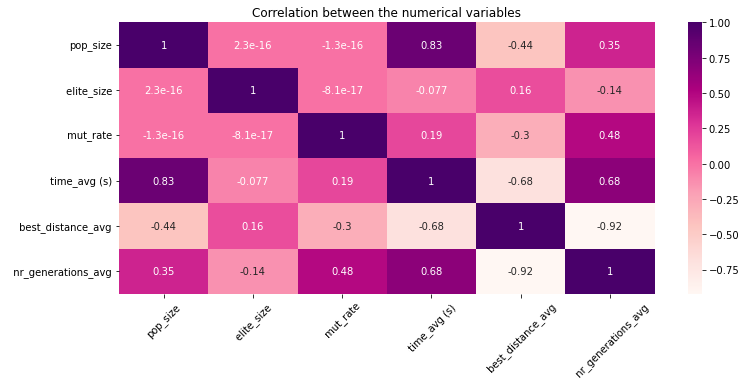

In [167]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.subplots(figsize=(12,5))
gender_correlation=p2.corr()
sns.heatmap(gender_correlation,annot=True,cmap='RdPu')
plt.title('Correlation between the numerical variables')
plt.xticks(rotation=45)                                           

#daqui vemos que a variável que tem mais correlação com a solução é o nr de generations e o pop size. no entanto, é negativa. 
#ou seja, quanto maior a população, menor a distancia, e melhor a solução.
#quanto maior os nr de gerações, menor a distancia, e melhor a solução.
#nota que, quanto maior a mutation rate, maior o nr de gerações.

#Assim, aumentando a mutation rate, aumenta o nr de gerações, que diminui a distância. 
#Este facto, faz sentido pois se aumentarmos a mutation rate, aumentamos também a exploração de diferente soluções,
#o que faz com que o algoritmo tenha necessidade de correr durante mais tempo e consiga atingir melhores soluções.

# 2.2.  Influência entre Mut_type e Cross_type e Distância

Para ver a influencia que as categóricas (mut_type) e (cross_type) tem na variável resposta, distância,
vamos fazer um teste não paramétrico (kruskal wallis) para comparaçao das médias.

In [171]:
#Mutation type
searchString = "swap"
p2_swap_only=p2.loc[p2[' mut_type'].str.contains(searchString, regex=False)]
searchString = "invert"
p2_invert_only=p2.loc[p2[' mut_type'].str.contains(searchString, regex=False)]
searchString = "insert"
p2_insert_only=p2.loc[p2[' mut_type'].str.contains(searchString, regex=False)]
searchString = "disp"
p2_disp_only=p2.loc[p2[' mut_type'].str.contains(searchString, regex=False)]

#Crossover type
searchString = "order"
p2_order_only=p2.loc[p2[' cross_type'].str.contains(searchString, regex=False)]
searchString = "cycle"
p2_cycle_only=p2.loc[p2[' cross_type'].str.contains(searchString, regex=False)]

#Population Size
p2_80_only=p2.loc[p2['pop_size'] == 80]
p2_150_only=p2.loc[p2['pop_size'] == 150]
p2_300_only=p2.loc[p2['pop_size'] == 300]


#Elite Size
p2_30_only=p2.loc[p2[' elite_size'] == 30]
p2_60_only=p2.loc[p2[' elite_size'] == 60]


#Mutation rate
p2_mut1_only=p2.loc[p2[' mut_rate'] == 0.0001]
p2_mut2_only=p2.loc[p2[' mut_rate'] == 0.001]
p2_mut3_only=p2.loc[p2[' mut_rate'] == 0.01]
p2_mut4_only=p2.loc[p2[' mut_rate'] == 0.1]

In [169]:
from scipy import stats
x = p2_swap_only[' best_distance_avg']
y = p2_invert_only[' best_distance_avg']
z = p2_insert_only[' best_distance_avg']
w = p2_disp_only[' best_distance_avg']
stats.kruskal(x, y, z, w)

#Como o p-value é muito grande, podemos concluir que não existem diferenças significativas entre os grupos. no significant differences between the groups.
#Logo, o tipo de mutação não parece influenciar muito a distância.

KruskalResult(statistic=0.09635416666662877, pvalue=0.9922713197387499)

In [172]:
x = p2_order_only[' best_distance_avg']
y = p2_cycle_only[' best_distance_avg']
stats.kruskal(x, y)

#Como o p-value é menor que 5%, podemos concluir que existem diferenças significativas entre os grupos.
#Logo, o tipo de crossover parece influenciar muito a distância.

KruskalResult(statistic=87.62964162348885, pvalue=7.893282332651128e-21)

# 2.3. Análise por cada hyper-parametro


## 2.3.1. Análise por tipo de crossover

In [173]:
p2_order_only[' best_distance_avg'].describe()

count       96.000000
mean     22386.847917
std       4720.339714
min      16809.600000
25%      19091.250000
50%      20835.100000
75%      23662.300000
max      34233.400000
Name:  best_distance_avg, dtype: float64

In [174]:
p2_cycle_only[' best_distance_avg'].describe()

count       96.000000
mean     30592.637500
std       4231.855147
min      21781.800000
25%      27779.850000
50%      31583.500000
75%      33783.600000
max      36421.800000
Name:  best_distance_avg, dtype: float64

In [175]:
##Analisando por tipo de crossover, parece que o order crossover traz melhores resultados. O máximo de distancia atingido é menor, 
#a média é menor, a mediana é menor, e é com este que se atinge o valor mínimo de 16809.

#Por isso, se calhar é melhor fazer mais runs com o order crossover.

## 2.3.2. Análise por tipo de mutação

In [176]:
p2_swap_only[' best_distance_avg'].describe()

count       48.000000
mean     26578.083333
std       5995.148252
min      18045.200000
25%      20455.750000
50%      25351.400000
75%      31836.400000
max      35548.600000
Name:  best_distance_avg, dtype: float64

In [177]:
p2_insert_only[' best_distance_avg'].describe()

count       48.000000
mean     26574.541667
std       5975.351690
min      17845.000000
25%      21712.300000
50%      25240.900000
75%      32586.350000
max      35834.400000
Name:  best_distance_avg, dtype: float64

In [178]:
p2_invert_only[' best_distance_avg'].describe()

count       48.000000
mean     26488.037500
std       6304.854137
min      17010.000000
25%      20905.400000
50%      25345.300000
75%      32645.350000
max      35828.200000
Name:  best_distance_avg, dtype: float64

In [179]:
p2_disp_only[' best_distance_avg'].describe()

count       48.000000
mean     26318.308333
std       6209.671052
min      16809.600000
25%      20530.500000
50%      25783.900000
75%      31914.100000
max      36421.800000
Name:  best_distance_avg, dtype: float64

In [129]:
##Lá em cima, vimos que o tipo de mutação não parece influenciar a distância. 
#De facto, os valores médios e medianos são todos muito parecidos. O valor mínimo da distancia e da mediana é obtido com
#displacement mutation, apesar de esta ser também a que possui a mediana maior.
#Mas como a distancia nao parece depender do tipo de mutação, pode-se fazer mais runs com a disp mutation.

## 2.3.3. Análise por population size

In [180]:
p2_80_only=p2.loc[p2['pop_size'] == 80]
p2_150_only=p2.loc[p2['pop_size'] == 150]
p2_300_only=p2.loc[p2['pop_size'] == 300]


#Elite Size
p2_30_only=p2.loc[p2[' elite_size'] == 30]
p2_60_only=p2.loc[p2[' elite_size'] == 60]


#Mutation rate
p2_mut1_only=p2.loc[p2[' mut_rate'] == 0.0001]
p2_mut2_only=p2.loc[p2[' mut_rate'] == 0.001]
p2_mut3_only=p2.loc[p2[' mut_rate'] == 0.01]
p2_mut4_only=p2.loc[p2[' mut_rate'] == 0.1]

In [181]:
p2_80_only[' best_distance_avg'].describe()

count       64.000000
mean     30533.346875
std       5205.451652
min      18941.600000
25%      25425.750000
50%      32790.900000
75%      34814.700000
max      36421.800000
Name:  best_distance_avg, dtype: float64

In [182]:
p2_150_only[' best_distance_avg'].describe()

count       64.000000
mean     25448.646875
std       5512.612846
min      17711.000000
25%      21105.100000
50%      23229.400000
75%      31828.150000
max      33769.200000
Name:  best_distance_avg, dtype: float64

In [183]:
p2_300_only[' best_distance_avg'].describe()

count       64.000000
mean     23487.234375
std       5248.998618
min      16809.600000
25%      19091.250000
50%      21812.900000
75%      28756.700000
max      31812.600000
Name:  best_distance_avg, dtype: float64

In [150]:
#O population size, como vimos na tabela das correlações acima, era negativamente correlacionado com a distância, logo
#um maior population size é melhor. 
#Além disso, possui melhores valores em todos os parâmetros.

## 2.3.4. Análise por elite size

In [184]:
p2_30_only[' best_distance_avg'].describe()

count       96.000000
mean     25500.964583
std       5623.658413
min      17711.000000
25%      20502.850000
50%      24110.800000
75%      30975.550000
max      35105.200000
Name:  best_distance_avg, dtype: float64

In [185]:
p2_60_only[' best_distance_avg'].describe()

count       96.000000
mean     27478.520833
std       6372.645440
min      16809.600000
25%      21406.400000
50%      30635.600000
75%      32842.450000
max      36421.800000
Name:  best_distance_avg, dtype: float64

In [160]:
###Como foi visto na tabela das correlações, não há grande diferença entre o elite_size e a distância.

## 2.3.5. Análise por mutation rate

In [186]:
p2_mut1_only[' best_distance_avg'].describe()

count       48.000000
mean     28108.137500
std       5863.165725
min      18352.800000
25%      22064.600000
50%      30722.200000
75%      32700.650000
max      35858.400000
Name:  best_distance_avg, dtype: float64

In [187]:
p2_mut2_only[' best_distance_avg'].describe()

count       48.000000
mean     28135.866667
std       6118.777360
min      18195.400000
25%      21987.700000
50%      30969.900000
75%      33138.750000
max      35832.000000
Name:  best_distance_avg, dtype: float64

In [188]:
p2_mut3_only[' best_distance_avg'].describe()

count       48.000000
mean     26227.208333
std       6444.578707
min      16809.600000
25%      19706.000000
50%      27703.700000
75%      31217.550000
max      36421.800000
Name:  best_distance_avg, dtype: float64

In [189]:
p2_mut4_only[' best_distance_avg'].describe()

count       48.000000
mean     23487.758333
std       4683.809164
min      17711.000000
25%      20118.650000
50%      22128.400000
75%      24986.850000
max      34987.000000
Name:  best_distance_avg, dtype: float64

In [190]:
#O melhor é mut4. Como vimos no gráfico das correlações, uma mutação maior é melhor. Apesar do valor minimo atingido ser com mut3, a mut4 é a melhor em todos os outros valores.

### 2.4 Conclusões:
Para o Problema 2 -> elite size 30, mutation_rate de 10% ou mais, population_size de 300 ou mais, order crossover, disp mutation